# Lei dos Grandes Números

## Exemplo 1 - Moeda Justa

Considere:
- temos uma moeda justa;
- esta moeda é lançada $n$ vezes
- sabemos que a média da distribuição $\mu = n \times p$
- qual é a probabilidade da média amostral $\bar{X}$ estar nos 10\% ao redor da média de $\mu$?

In [29]:
### Algumas variáveis
p <- 0.5 # probabilidade de cara

# como queremos os 10% centrais, ao redor da média que está em n*p = n*0.5
li <- 0.45 # limite inferior da probabilidade
ls <- 0.55 # limite superior da probabilidade

### algumas funções... apenas para diminuir a quantidade de código nas próximas células

# retorna todos os inteiros que estejam dentro dos 10% centrais de determinado valor de n
my_list <- function (n, info=F) {
    x0 <- ceiling(n*li)  # calcula o limite inferior
    xf <- floor(n*ls)    # calcula o limite superior
    if (info) {
        print(paste('Limite inferior =', x0))
        print(paste('Limite superior =', xf))
    }
    seq (x0, xf)         # cria sequência de números inteiros
}

# retorna a probabilidade de X estar entre os limites inferior e superior retornados na função acima
calc_prob <- function (n, info=F) {
    soma <- 0.0 # variável acumulativa
    for (x in my_list(n, info)) {
        soma <- soma + dbinom(x, n, p)
    }
    soma
}

In [30]:
# 10 moedas
n <- 10

calc_prob(n, info=T)

[1] "Limite inferior = 5"
[1] "Limite superior = 5"


[1] 0.2460938

In [31]:
# 100 moedas
n <- 100

calc_prob(n, info=T)

[1] "Limite inferior = 45"
[1] "Limite superior = 55"


[1] 0.728747

In [32]:
# 1000 moedas
n <- 1000

calc_prob(n, info=T)

[1] "Limite inferior = 450"
[1] "Limite superior = 550"


[1] 0.9986083

## Exemplo 2: Lançamento de Dados

Considere:
- um dado de 6 faces justo
- $X$ é a face que cai em cada jogada
- qual é a média e desvio padrão amostrais para $n$ observaçóes desta variável?

In [101]:
### Em primeiro lugar, vamos determinar a média e o desvio padrão da distribuição
x <- 1:6
px <- rep(1/6, 6)
Ex  <- sum(x*px)
Ex2 <- sum(x^2*px)
sigma2 <- sqrt(Ex2 - Ex^2)
print(paste('A média da distribuição é ',Ex))
print(paste('O desvio-padrão da distribuição é',sigma2))

dado <- function (n) {
    # gera n valores inteiros dentro da sequência x (1:6), os valores podem se repetir
    rand <- sample (x, n, replace=T)
    
    print (paste('Média amostral = ', mean(rand)))
    
    print (paste('desvio-padrão amostral = ', sd(rand)))
}

[1] "A média da distribuição é  3.5"
[1] "O desvio-padrão da distribuição é 1.70782512765993"


In [102]:
# n = 10
dado (10)

[1] "Média amostral =  3.1"
[1] "desvio-padrão amostral =  1.91195071996"


In [103]:
# n = 100
dado (100)

[1] "Média amostral =  3.17"
[1] "desvio-padrão amostral =  1.80378390159031"


In [104]:
# n = 1000
dado (1000)

[1] "Média amostral =  3.525"
[1] "desvio-padrão amostral =  1.70125520403885"


In [105]:
# n = 10000
dado (10000)

[1] "Média amostral =  3.4962"
[1] "desvio-padrão amostral =  1.70343057609424"


## Exemplo 3 : Distribuição de Poisson

Considere:
- uma variável aleatória $X$ que segue uma distribuição de Poisson
- $\lambda = 1$
- qual é a média e o desvio-padrão amostrais para $n$ observações desta variável?

In [106]:
### Algumas variáveis e funções
lambda <- 1

## chamando biblioteca ggplot
library (ggplot2)


do_the_job <- function (n, seed=123) {
    # reseta o gerador de números aleatórios
    set.seed (seed)
    
    # gera n números aleatórios segundo a dsitribuição de poisson
    nbrs <- rpois (n, lambda=lambda)
    
    # gera o gráfico
    # my_hist <- hist(nbrs, xlab="X", ylab="Probabilidade", main=paste("Distribuição de Poisson - n =", n), probability=T)
    
    ## cria um data.frame a partir da tabela de contingencia dos numeros aleatorios criados
    df <- as.data.frame(table (nbrs))
    
    ## adiciona uma coluna ao data.frame criado no passo anterior contendo o valor da distribuicao de Poisson
    ## para os valores de X sorteados anteriormente
    x <- as.numeric(levels(df$nbrs))
    dist <- dpois(x, lambda=lambda)
    df[, "pois" ] <- dist
 
    # mostra o gráfico dos valores obtidos
    p <- ggplot(df) +
      geom_col (aes(x = nbrs, y = Freq/n), size = 1, color = "darkblue", fill = "white") +
      geom_line(aes(x = nbrs, y = pois), size = 1.5, color="red", group = 1)

    print (p)
    
    print(paste('Média da distribuição =',lambda))
    # cálculo da média amostral
    print (paste('Média amostral = ', mean(nbrs)))
    
    print(paste('Desvio-padrão da distribuição =',sqrt(lambda)))
    # cálculo da média amostral
    print (paste('desvio-padrão amostral = ', sd(nbrs)))
    
}

[1] "Média da distribuição = 1"
[1] "Média amostral =  0.7"
[1] "Desvio-padrão da distribuição = 1"
[1] "desvio-padrão amostral =  0.823272602348565"


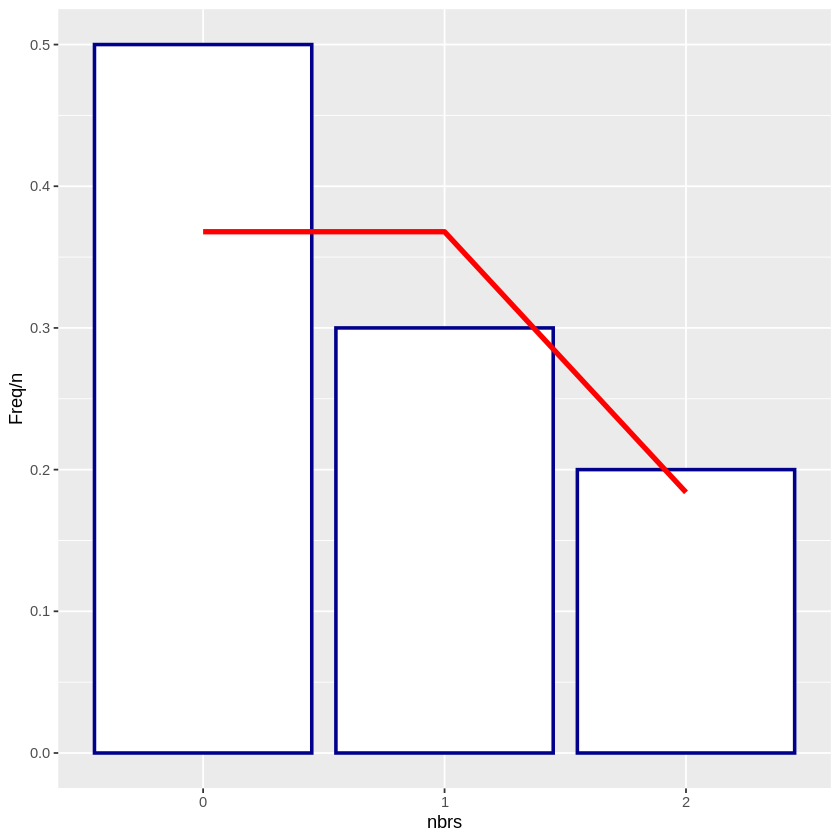

In [107]:
# n = 10
seed = 12312
n <- 10
do_the_job(n, seed=seed)

[1] "Média da distribuição = 1"
[1] "Média amostral =  1.01"
[1] "Desvio-padrão da distribuição = 1"
[1] "desvio-padrão amostral =  0.969171259010981"


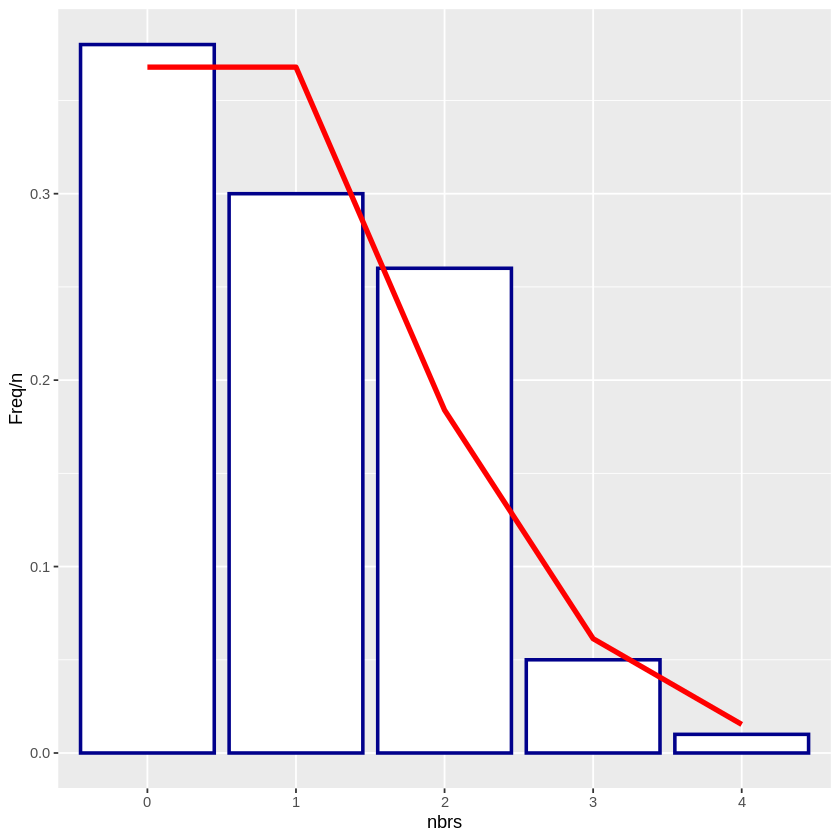

In [108]:
# n = 100
seed <- 12312
n    <- 100
do_the_job(n, seed=seed)

[1] "Média da distribuição = 1"
[1] "Média amostral =  0.981"
[1] "Desvio-padrão da distribuição = 1"
[1] "desvio-padrão amostral =  0.977545188006465"


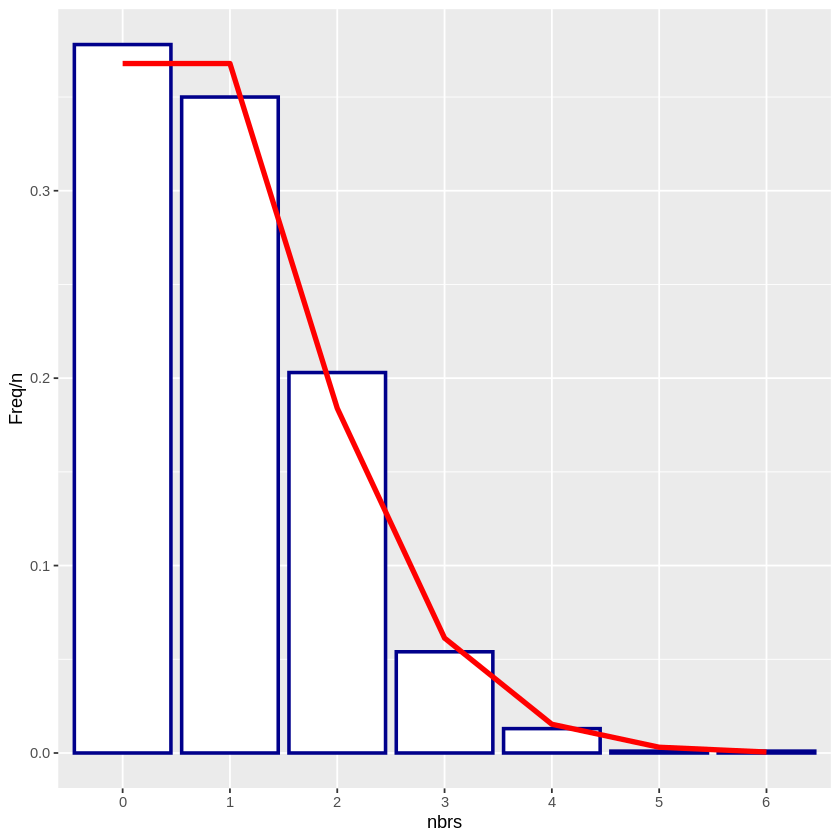

In [90]:
# n = 1000
seed <- 12312
n    <- 1000
do_the_job(n, seed=seed)